In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.6, 9 * 0.6)})

In [3]:
input_data_file = '/Users/adrian/gd15/research/vigur/data/targeted.2024.eva/EC_72_EVA_All_ION_MODES.xlsx'

In [4]:
basicdf = pandas.read_excel(input_data_file, sheet_name='BASIC_NEG', index_col='SAMPLE')
basicdf.head()

,Sample,SHOT ORDER,LCMS_BATCH_Biological_replicate,TREATMENT,TIME,Cell Count,Technical replicate,Alanine IS,AMP IS,Citrate IS,...,Phosphoenolpyruvate,erythrose 4-phosphate,Citrate,hydroxyglutarate,Aspartate,glycerol phosphate,Adrenaline,Niacinamide,Tyrosine,N-acetyl Glutamate
SAMPLE,,,,,,,,,,,,,,,,,,,,,
Pool,Pool,1,1,NaN,NaN,NaN,NaN,865.404,69.021,1057.016,...,52.040,41.523,237.663,713.870,260.327,35.492,264.610,572.353,75.170,72.749
072-48,NEG_072-48_5 µM epi:nor_4,2,1,5 µM epi:nor,4.0,167000.0,1.0,0.473,226.107,93.586,...,82.744,77.874,157.720,116.584,468.921,8.897,283.618,0.000,91.716,184.931
072-52,NEG_072-52_TNFa_4,3,1,TNFa,4.0,226000.0,2.0,0.634,68.874,101.881,...,30.406,38.643,269.912,21.599,58.803,1.495,65.873,0.000,14.736,19.691
072-50,NEG_072-50_5 µM epi:nor_4,4,1,5 µM epi:nor,4.0,167000.0,3.0,0.907,466.702,49.439,...,4.890,54.335,290.670,100.339,471.287,11.992,306.999,23.383,84.216,154.960
072-59,NEG_072-59_5 µM epi_24,5,1,5 µM epi,24.0,249000.0,3.0,0.331,265.049,36.159,...,15.888,34.069,715.790,148.353,231.172,11.981,127.805,0.000,39.444,114.604


In [5]:
batch_one = basicdf[basicdf['LCMS_BATCH_Biological_replicate'] == 1]
intensities = batch_one.iloc[:, 7:]
intensities.drop('Pool', axis=0, inplace=True)
intensities = intensities.transpose()
log10_intensities = numpy.log10(intensities + 1)
log10_intensities.head()

SAMPLE,072-48,072-52,072-50,072-59,072-67,072-57,072-64,072-39,072-49,072-66,...,072-68,072-44,072-42,072-65,072-63,072-55,072-43,072-61,072-51,072-53
Alanine IS,0.168203,0.213252,0.280351,0.124178,0.119586,0.000000,0.153510,0.000000,0.056524,0.000000,...,0.000000,0.000000,0.202761,0.000000,0.000000,0.000000,0.000000,0.000000,0.335658,0.000000
AMP IS,2.356231,1.844316,2.669969,2.424962,2.556665,2.286638,2.596274,2.193965,2.437440,2.084887,...,2.840733,2.575160,1.460778,2.061275,2.018293,2.354840,2.232488,2.193372,2.382210,2.574276
Citrate IS,1.975827,2.012335,1.702766,1.570064,1.250566,1.326684,1.166045,1.855453,1.757829,1.569994,...,1.494933,1.388190,1.329987,1.258470,1.145600,1.829947,1.790925,1.533848,1.464042,1.453807
Glucose IS,0.000000,0.000000,1.814813,0.553033,0.714414,0.981275,1.433033,1.381314,0.891147,0.000000,...,0.549984,1.265384,0.000000,1.972082,1.135927,0.943445,0.675778,0.000000,0.816308,1.015234
Glutamic Acid IS,2.884568,2.258117,2.665167,2.868344,2.904779,2.823350,2.962588,3.043735,2.856378,2.702756,...,2.929949,2.921888,2.855574,2.684649,2.660564,2.922861,2.954817,2.794651,2.994140,2.881593


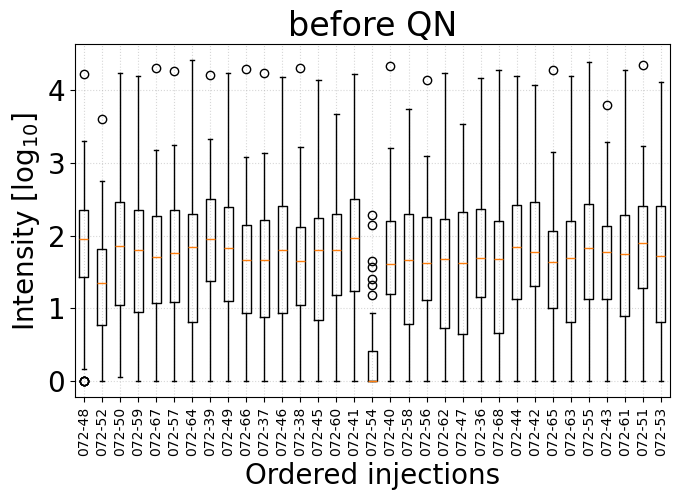

In [6]:
matplotlib.pyplot.boxplot(log10_intensities, labels=intensities.columns)
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.xlabel('Ordered injections')
matplotlib.pyplot.ylabel('Intensity [log$_{10}$]')
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.title('before QN')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [ ]:
# seaborn.set_style("white")
# g = seaborn.violinplot(data=log10_intensities, cut=0, bw=.15, scale="count", color='tab:blue')
# g.set(ylabel='log10 orig. intensities', xlabel='Samples', title='Before QN')
# g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=10)

# matplotlib.pyplot.grid(ls=':')
# matplotlib.pyplot.tight_layout()
# matplotlib.pyplot.show()

In [7]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(log10_intensities.values, axis=0), 
                             index=log10_intensities.index, 
                             columns=log10_intensities.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = log10_intensities.rank(method="min").stack().astype(int).map(df_mean).unstack()

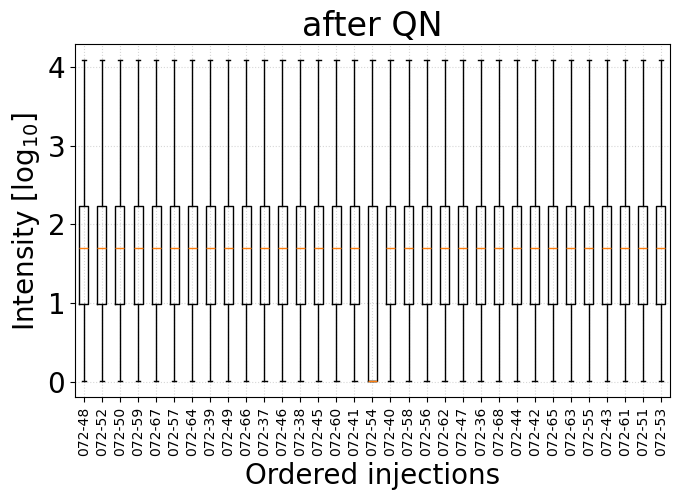

In [8]:
matplotlib.pyplot.boxplot(df_qn, labels=df_qn.columns)
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.xlabel('Ordered injections')
matplotlib.pyplot.ylabel('Intensity [log$_{10}$]')
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.title('after QN')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [9]:
df_qn.drop('072-54', axis=1, inplace=True)

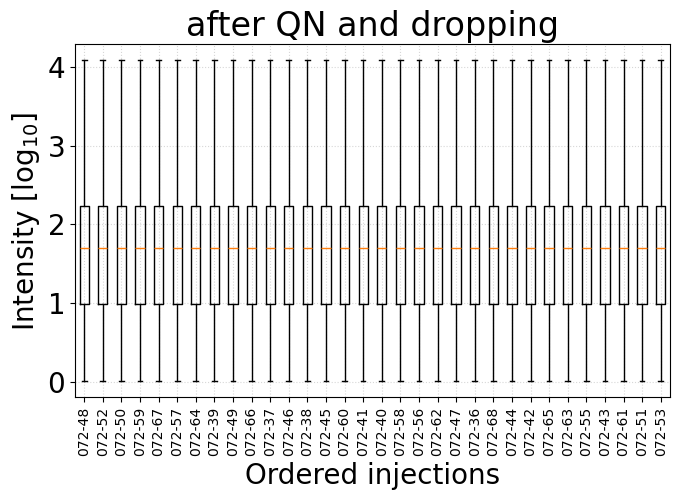

In [10]:
matplotlib.pyplot.boxplot(df_qn, labels=df_qn.columns)
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.xlabel('Ordered injections')
matplotlib.pyplot.ylabel('Intensity [log$_{10}$]')
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.title('after QN and dropping')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [23]:
t_df_qn = df_qn.transpose()
t_df_qn.head()

,Alanine IS,AMP IS,Citrate IS,Glucose IS,Glutamic Acid IS,Phenylalanine IS,Succinate IS,Glutamic acid,Hexose 6-phosphate,Glutamine,...,Phosphoenolpyruvate,erythrose 4-phosphate,Citrate,hydroxyglutarate,Aspartate,glycerol phosphate,Adrenaline,Niacinamide,Tyrosine,N-acetyl Glutamate
SAMPLE,,,,,,,,,,,,,,,,,,,,,
072-48,0.326769,2.209439,1.777669,0.001782,2.801510,0.400094,1.858851,3.185361,1.635611,3.093257,...,1.596967,1.555245,2.012732,1.916002,2.640030,0.776344,2.425258,0.001782,1.712528,2.160305
072-52,0.570656,2.379341,2.640030,0.001782,2.801510,0.001782,2.591142,3.093257,1.749929,3.185361,...,1.858851,1.916002,2.900201,1.712528,2.160305,0.776344,2.289618,0.001782,1.555245,1.635611
072-50,0.157321,2.461375,1.555245,1.635611,2.425258,0.090523,2.078529,3.093257,1.882180,3.185361,...,0.639538,1.596967,2.244452,1.916002,2.519022,1.072662,2.289618,1.288777,1.822005,2.012732
072-59,0.090523,2.289618,1.555245,0.400094,2.801510,0.326769,1.460104,3.185361,1.777669,3.093257,...,1.236592,1.505969,2.700994,2.160305,2.244452,1.130019,2.052605,0.001782,1.596967,1.962533
072-67,0.090523,2.379341,1.404325,0.639538,2.801510,0.205254,2.289618,3.185361,1.749929,3.093257,...,1.072662,1.555245,2.700994,1.882180,2.012732,0.971518,2.209439,0.001782,1.460104,1.962533


In [33]:
import sklearn
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pandas.DataFrame(std_scaler.fit_transform(t_df_qn), columns=t_df_qn.columns, index=t_df_qn.index)

df_std.head()

,Alanine IS,AMP IS,Citrate IS,Glucose IS,Glutamic Acid IS,Phenylalanine IS,Succinate IS,Glutamic acid,Hexose 6-phosphate,Glutamine,...,Phosphoenolpyruvate,erythrose 4-phosphate,Citrate,hydroxyglutarate,Aspartate,glycerol phosphate,Adrenaline,Niacinamide,Tyrosine,N-acetyl Glutamate
SAMPLE,,,,,,,,,,,,,,,,,,,,,
072-48,1.520888,-0.216065,1.074379,-1.493304,0.234050,0.343083,-0.298218,0.529214,-1.179674,-0.577350,...,0.767514,-0.006333,-2.577359,-0.290265,0.822042,-0.319509,1.708897,-0.718964,0.540640,1.432840
072-52,3.158122,0.408567,4.004683,-1.493304,0.234050,-1.319927,1.844916,-0.996987,-0.322528,1.732051,...,1.575508,2.319116,1.173976,-1.881463,-1.691484,-0.319509,0.453839,-0.718964,-0.831748,-2.657614
072-50,0.383365,0.710155,0.318581,1.626325,-2.775977,-0.949421,0.344696,-0.996987,0.669083,1.732051,...,-2.186450,0.262607,-1.597880,-0.290265,0.188020,0.808371,0.453839,1.510970,1.495890,0.282382
072-59,-0.065059,0.078706,0.318581,-0.732768,0.234050,0.036942,-1.465200,0.529214,-0.114530,-0.577350,...,-0.344356,-0.323971,0.331924,1.620228,-1.250595,1.026692,-1.739204,-0.718964,-0.467701,-0.108970
072-67,-0.065059,0.408567,-0.194249,-0.275574,0.234050,-0.470403,0.962471,0.529214,-0.322528,-0.577350,...,-0.850130,-0.006333,0.331924,-0.554756,-2.464692,0.423385,-0.288048,-0.718964,-1.661915,-0.108970


In [28]:
mu = numpy.mean(df_std.loc[:,'Alanine IS'])
dev = numpy.std(df_std.loc[:,'Alanine IS'])
print(mu, dev)

4.163336342344337e-17 1.0


In [29]:
import seaborn

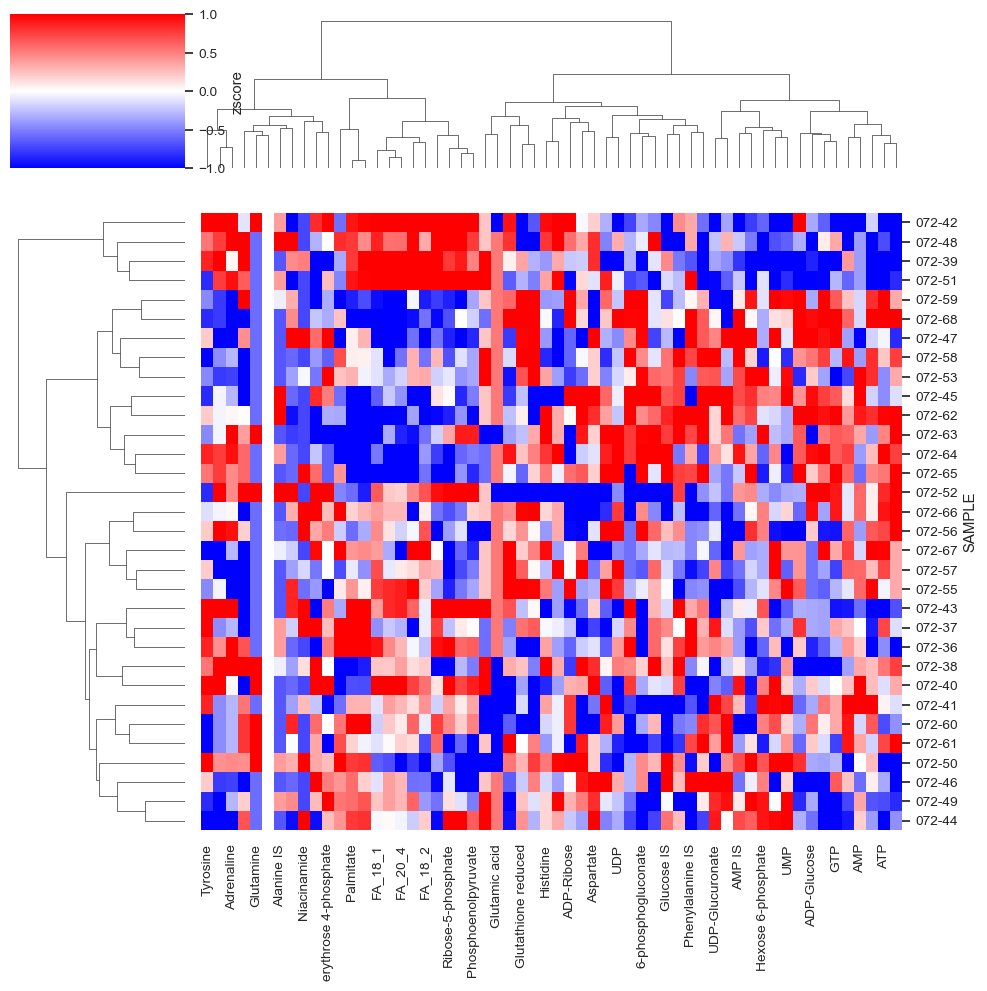

In [34]:
# generate the figure with metabolite names
linkage_method = 'ward'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(df_std, 
                   cmap='bwr', col_cluster=True, vmin=-1, vmax=1, 
                   method=linkage_method, metric=distance_metric, 
                   yticklabels=1, 
                   cbar_kws={'label':'zscore'})
matplotlib.pyplot.tight_layout()